In [1]:
!pip install pyspark
# Importing necessary libraries
from pyspark.sql import SparkSession

# Creating a SparkSession
spark = SparkSession.builder.appName("BigDataAnalytics").getOrCreate()

# Reading the dataset
data = spark.read.csv("nyc_taxi_trip_duration.csv", header=True, inferSchema=True)

# Displaying the dataset schema
data.printSchema()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=1e7e935f9dc7af542003debd8d0372f92b87bd09d7621b4d0170d384a33c4675
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
root
 |-- id: string (nullable = true)
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: integer (nullable = true)



In [ ]:
# Counting the number of records in the dataset
record_count = data.count()
print("Number of records:", record_count)

In [ ]:
# Summary statistics of the trip duration
data.describe("trip_duration").show()

In [ ]:
# Dropping irrelevant columns
data = data.drop("id", "vendor_id",  "dropoff_datetime", "store_and_fwd_flag")

In [ ]:
# Handling missing values
data = data.dropna()

In [ ]:
# Checking for duplicates
duplicate_count = data.count() - data.dropDuplicates().count()
print("Number of duplicates:", duplicate_count)

In [ ]:
data.printSchema()

In [ ]:
# Importing necessary libraries
from pyspark.sql.functions import col, hour, dayofweek

In [ ]:
# Adding new features
data = data.withColumn("pickup_hour", hour(col("pickup_datetime")))
data = data.withColumn("pickup_dayofweek", dayofweek(col("pickup_datetime")))

In [ ]:
# Aggregating and summarizing data
avg_duration_by_hour = data.groupBy("pickup_hour").avg("trip_duration").orderBy("pickup_hour")
avg_duration_by_day = data.groupBy("pickup_dayofweek").avg("trip_duration").orderBy("pickup_dayofweek")

In [ ]:
# Displaying the results
avg_duration_by_hour.show()
avg_duration_by_day.show()

+-----------+------------------+
|pickup_hour|avg(trip_duration)|
+-----------+------------------+
|          0| 1024.416126843112|
|          1| 848.4636386833375|
|          2| 866.1258854952968|
|          3| 959.6624767225326|
|          4| 907.9348914858097|
|          5| 874.5366962546005|
|          6| 704.4083852467121|
|          7| 814.3057402870144|
|          8| 935.0159749105699|
|          9| 931.1995105801066|
|         10| 938.3098105852366|
|         11| 962.6128335573046|
|         12|  977.284139564544|
|         13|1001.7377964381286|
|         14|1064.4859428971185|
|         15| 1111.105195696956|
|         16|1106.5998555435176|
|         17|1030.1734741884436|
|         18| 985.2784928118166|
|         19| 881.7071771707177|
+-----------+------------------+
only showing top 20 rows

+----------------+------------------+
|pickup_dayofweek|avg(trip_duration)|
+----------------+------------------+
|               1| 901.6788972431077|
|               2| 891.1790159

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

In [ ]:
# Converting DataFrame to Pandas DataFrame for visualization
pandas_data = data.toPandas()

In [ ]:
pandas_data.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_dayofweek
0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,16,2
1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,23,6
2,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,17,1
3,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,9,3
4,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,848,6,4


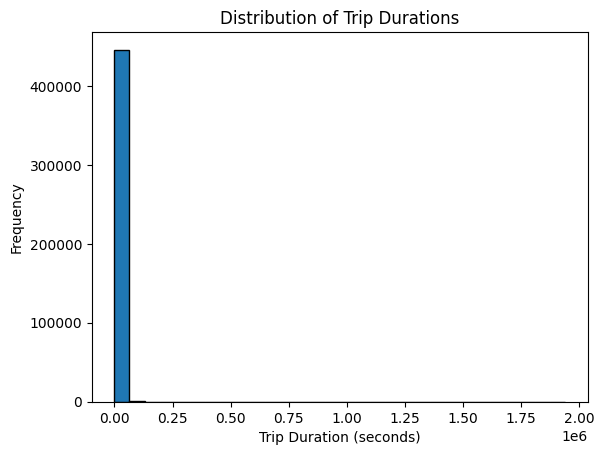

In [ ]:
# Plotting trip duration distribution
plt.hist(pandas_data["trip_duration"], bins=30, edgecolor="black")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.show()

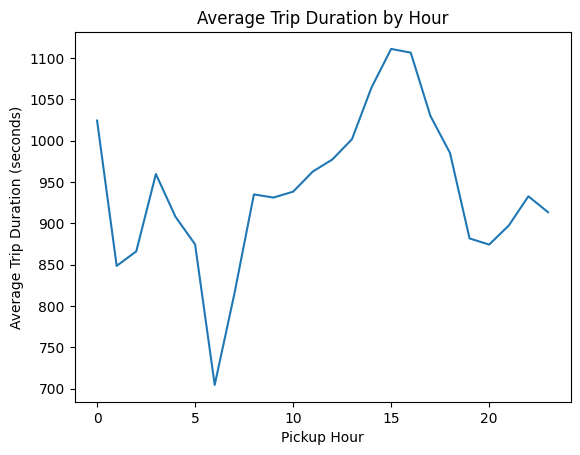

In [ ]:
# Plotting average trip duration by hour
plt.plot(avg_duration_by_hour.toPandas()["pickup_hour"], avg_duration_by_hour.toPandas()["avg(trip_duration)"])
plt.xlabel("Pickup Hour")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Hour")
plt.show()